# Aula 1 An√°lisando uma Base de Dados

In [44]:
# importar biblioteca pandas e apelidar
import pandas as pd

In [45]:
# trazer e ler base de dados de acordo com seu formato
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [46]:
# exibir dados caso n√£o especifique numero de linhas ser√° exibido as 5 primeiras
df.head(10)

work_year experience_level employment_type           job_title  salary  \
0     2025.0               SE              FT  Solutions Engineer  214000   
1     2025.0               SE              FT  Solutions Engineer  136000   
2     2025.0               MI              FT       Data Engineer  158800   
3     2025.0               MI              FT       Data Engineer  139200   
4     2025.0               EN              FT       Data Engineer   90000   
5     2025.0               EN              FT       Data Engineer   80000   
6     2025.0               SE              FT      Data Scientist  185000   
7     2025.0               SE              FT      Data Scientist  148000   
8     2025.0               MI              FT      Data Scientist  135000   
9     2025.0               MI              FT      Data Scientist  108000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         214000                 US           100   
1             USD         136000                 US           100   
2             USD         158800                 AU             0   
3             USD         139200                 AU             0   
4             USD          90000                 US             0   
5             USD          80000                 US             0   
6             USD         185000                 US             0   
7             USD         148000                 US             0   
8             USD         135000                 CA             0   
9             USD         108000                 CA             0   

  company_location company_size  
0               US            M  
1               US            M  
2               AU            M  
3               AU            M  
4               US            M  
5               US            M  
6               US            M  
7               US            M  
8               CA            M  
9               CA            M

In [47]:
# exibir informa√ß√µes da base como numero de registros e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [48]:
# exibe dados n√∫mericos descrevendo algumas quest√µes
df.describe()

work_year        salary  salary_in_usd   remote_ratio
count  133339.000000  1.333490e+05  133349.000000  133349.000000
mean     2024.358770  1.632833e+05  157617.272098      20.905669
std         0.680627  2.173860e+05   74288.363097      40.590044
min      2020.000000  1.400000e+04   15000.000000       0.000000
25%      2024.000000  1.060200e+05  106000.000000       0.000000
50%      2024.000000  1.470000e+05  146206.000000       0.000000
75%      2025.000000  1.990000e+05  198000.000000       0.000000
max      2025.000000  3.040000e+07  800000.000000     100.000000

In [49]:
# captura o tamanho da tabela (n¬∫ linhas, n¬∫ colunas)
# shape √© um objeto, um vetor com dois valores
df.shape

(133349, 11)

In [50]:
linhas, colunas = df.shape[0], df.shape[1]

In [51]:
print("linhas: ", linhas)
print("colunas: ", colunas)

linhas:  133349
colunas:  11


In [52]:
# captura as colunas da tabela
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [53]:
# renomeando colunas para portugu√™s do Brasil
renomear_colunas = {
    'work_year': 'ano_trabalho',
    'experience_level': 'nivel_experiencia',
    'employment_type': 'tipo_emprego',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda_salario',
    'salary_in_usd': 'salario_em_usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'taxa_remoto',
    'company_location': 'localizacao_empresa',
    'company_size': 'porte_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)
df.columns

Index(['ano_trabalho', 'nivel_experiencia', 'tipo_emprego', 'cargo', 'salario',
       'moeda_salario', 'salario_em_usd', 'residencia', 'taxa_remoto',
       'localizacao_empresa', 'porte_empresa'],
      dtype='object')

In [54]:
# Obtendo resultados da coluna
df['nivel_experiencia'].value_counts()

nivel_experiencia
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [55]:
df['tipo_emprego'].value_counts()

tipo_emprego
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [56]:
df['taxa_remoto'].value_counts()

taxa_remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [57]:
df['porte_empresa'].value_counts()

porte_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [58]:
nivel_experiencia = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df['nivel_experiencia'] = df['nivel_experiencia'].replace(nivel_experiencia)
df['nivel_experiencia'].value_counts()

nivel_experiencia
Senior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [59]:
tipo_contrato = {
    'FT': 'Tempo Integral',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer',
    'CT': 'Contrato'
}

df['tipo_emprego'] = df['tipo_emprego'].replace(tipo_contrato)
df['tipo_emprego'].value_counts()

tipo_emprego
Tempo Integral    132563
Contrato             394
Tempo Parcial        376
Freelancer            16
Name: count, dtype: int64

In [60]:
porte_empresa = {
    'S': 'Pequena',
    'M': 'M√©dia',
    'L': 'Grande'
}

df['porte_empresa'] = df['porte_empresa'].replace(porte_empresa)
df['porte_empresa'].value_counts()

porte_empresa
M√©dia      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [61]:
taxa_remoto = {
    0: 'Presencial',
    50: 'H√≠brido',
    100: 'Remoto'
}

df['taxa_remoto'] = df['taxa_remoto'].replace(taxa_remoto)
df['taxa_remoto'].value_counts()

taxa_remoto
Presencial    105312
Remoto         27718
H√≠brido          319
Name: count, dtype: int64

In [62]:
df.head()

ano_trabalho nivel_experiencia    tipo_emprego               cargo  \
0        2025.0            Senior  Tempo Integral  Solutions Engineer   
1        2025.0            Senior  Tempo Integral  Solutions Engineer   
2        2025.0             Pleno  Tempo Integral       Data Engineer   
3        2025.0             Pleno  Tempo Integral       Data Engineer   
4        2025.0            Junior  Tempo Integral       Data Engineer   

   salario moeda_salario  salario_em_usd residencia taxa_remoto  \
0   214000           USD          214000         US      Remoto   
1   136000           USD          136000         US      Remoto   
2   158800           USD          158800         AU  Presencial   
3   139200           USD          139200         AU  Presencial   
4    90000           USD           90000         US  Presencial   

  localizacao_empresa porte_empresa  
0                  US         M√©dia  
1                  US         M√©dia  
2                  AU         M√©dia  
3                  AU         M√©dia  
4                  US         M√©dia

In [63]:
df.describe(include='object')

nivel_experiencia    tipo_emprego           cargo moeda_salario  \
count             133349          133349          133349        133349   
unique                 4               4             390            26   
top               Senior  Tempo Integral  Data Scientist           USD   
freq               77241          132563           17314        126140   

       residencia taxa_remoto localizacao_empresa porte_empresa  
count      133349      133349              133349        133349  
unique        102           3                  95             3  
top            US  Presencial                  US         M√©dia  
freq       119579      105312              119641        129561

In [64]:
df.describe()

ano_trabalho       salario  salario_em_usd
count  133339.000000  1.333490e+05   133349.000000
mean     2024.358770  1.632833e+05   157617.272098
std         0.680627  2.173860e+05    74288.363097
min      2020.000000  1.400000e+04    15000.000000
25%      2024.000000  1.060200e+05   106000.000000
50%      2024.000000  1.470000e+05   146206.000000
75%      2025.000000  1.990000e+05   198000.000000
max      2025.000000  3.040000e+07   800000.000000

# Nova se√ß√£o

# Aula 2 Tratando uma Base de Dados

In [65]:
# retorna quais campos da tabelas n√£o possui dados
#       True  -> se o valor for nulo (NaN)
#       False -> se o valor N√ÉO for nulo

df.isnull()


ano_trabalho  nivel_experiencia  tipo_emprego  cargo  salario  \
0              False              False         False  False    False   
1              False              False         False  False    False   
2              False              False         False  False    False   
3              False              False         False  False    False   
4              False              False         False  False    False   
...              ...                ...           ...    ...      ...   
133344         False              False         False  False    False   
133345         False              False         False  False    False   
133346         False              False         False  False    False   
133347         False              False         False  False    False   
133348         False              False         False  False    False   

        moeda_salario  salario_em_usd  residencia  taxa_remoto  \
0               False           False       False        False   
1               False           False       False        False   
2               False           False       False        False   
3               False           False       False        False   
4               False           False       False        False   
...               ...             ...         ...          ...   
133344          False           False       False        False   
133345          False           False       False        False   
133346          False           False       False        False   
133347          False           False       False        False   
133348          False           False       False        False   

        localizacao_empresa  porte_empresa  
0                     False          False  
1                     False          False  
2                     False          False  
3                     False          False  
4                     False          False  
...                     ...            ...  
133344                False          False  
133345                False          False  
133346                False          False  
133347                False          False  
133348                False          False  

[133349 rows x 11 columns]

In [66]:
# soma os campos da coluna que n√£o possuem valores
df.isnull().sum()

ano_trabalho           10
nivel_experiencia       0
tipo_emprego            0
cargo                   0
salario                 0
moeda_salario           0
salario_em_usd          0
residencia              0
taxa_remoto             0
localizacao_empresa     0
porte_empresa           0
dtype: int64

In [67]:
# retorna os valores √∫nicos que a coluna possui
# nan = not a number (n√£o √© um n√∫mero)
df['ano_trabalho'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [68]:
df[df.isnull().any(axis=1)]

# Filtra o DataFrame 'df' e retorna apenas as linhas
# que cont√™m pelo menos um valor nulo (NaN).

# O m√©todo .any(axis=1) verifica, para cada linha (axis=1 significa "por linha"),
# se existe pelo menos UM valor True (ou seja, pelo menos um valor nulo) nessa linha.


ano_trabalho nivel_experiencia    tipo_emprego  \
5588             NaN            Senior  Tempo Integral   
59692            NaN             Pleno  Tempo Integral   
59710            NaN            Junior  Tempo Integral   
59759            NaN            Senior  Tempo Integral   
59789            NaN            Senior  Tempo Integral   
131000           NaN            Senior  Tempo Integral   
131006           NaN            Senior  Tempo Integral   
133054           NaN            Junior  Tempo Integral   
133281           NaN             Pleno  Tempo Integral   
133317           NaN             Pleno  Tempo Integral   

                            cargo  salario moeda_salario  salario_em_usd  \
5588              Product Manager   184500           USD          184500   
59692                    Engineer   110000           USD          110000   
59710              Data Scientist   208800           USD          208800   
59759           Software Engineer   135000           USD          135000   
59789                    Engineer   112000           USD          112000   
131000  Machine Learning Engineer   163800           USD          163800   
131006     Data Analytics Manager   204500           USD          204500   
133054             Data Scientist    40000           USD           40000   
133281  Machine Learning Engineer   180000           PLN           46597   
133317             Data Scientist   130000           USD          130000   

       residencia taxa_remoto localizacao_empresa porte_empresa  
5588           US  Presencial                  US         M√©dia  
59692          DE  Presencial                  DE         M√©dia  
59710          US  Presencial                  US         M√©dia  
59759          US  Presencial                  US         M√©dia  
59789          US  Presencial                  US         M√©dia  
131000         US  Presencial                  US         M√©dia  
131006         US  Presencial                  US         M√©dia  
133054         JP      Remoto                  MY        Grande  
133281         PL      Remoto                  PL        Grande  
133317         US     H√≠brido                  US        Grande

In [69]:
'''
Em uma base de dados, √© importante tratar valores nulos (NaN),
pois eles podem impactar negativamente a an√°lise e a interpreta√ß√£o dos resultados.

Exemplo:
Se treinarmos um modelo de IA com muitos valores inexistentes,
ele pode acabar associando a aus√™ncia de dados (nulo) a um resultado incorreto.

Observa√ß√£o:
A aus√™ncia de dado (nulo) √© diferente de um valor zero.
Por exemplo, um aluno tirar nota 0 em uma prova √© diferente de n√£o ter feito a prova.

Principais formas de tratamento:
- Preench√™-los com outro valor, seguindo uma regra ou m√©todo,
  como m√©dia, mediana, moda (valor mais comum), interpola√ß√£o, entre outros.
- Excluir as linhas ou colunas que cont√™m valores nulos,
  dependendo do impacto dessa remo√ß√£o na an√°lise.

A seguir, ser√£o apresentados exemplos de como preencher esses valores.
'''

'\nEm uma base de dados, √© importante tratar valores nulos (NaN),\npois eles podem impactar negativamente a an√°lise e a interpreta√ß√£o dos resultados.\n\nExemplo:\nSe treinarmos um modelo de IA com muitos valores inexistentes,\nele pode acabar associando a aus√™ncia de dados (nulo) a um resultado incorreto.\n\nObserva√ß√£o:\nA aus√™ncia de dado (nulo) √© diferente de um valor zero.\nPor exemplo, um aluno tirar nota 0 em uma prova √© diferente de n√£o ter feito a prova.\n\nPrincipais formas de tratamento:\n- Preench√™-los com outro valor, seguindo uma regra ou m√©todo,\n  como m√©dia, mediana, moda (valor mais comum), interpola√ß√£o, entre outros.\n- Excluir as linhas ou colunas que cont√™m valores nulos,\n  dependendo do impacto dessa remo√ß√£o na an√°lise.\n\nA seguir, ser√£o apresentados exemplos de como preencher esses valores.\n'

In [70]:
# criando um mini dataframe de s√°larios para preencher com a m√©dia e mediana dos valores que existem

import numpy as np

df_salarios = pd.DataFrame({
    'nome': ['Cesar', 'Ana', 'Bruno', 'Maria', 'Val√©ria'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

# df_salarios['salario_media'] - nova coluna que onde valores nulos ser√£o preenchidos
# df_salarios['salario_mediana'] - nova coluna que onde valores nulos ser√£o preenchidos
# fillna - preencher valores nulos com o valor do resultado met√©do (m√©dia, mediana, etc.) dos valores da coluna especificada
# mean - m√©dia
# median - mediana
# round - arrendonda as casas decimais

df_salarios # exibir


nome   salario  salario_media  salario_mediana
0    Cesar    4000.0        4000.00           4000.0
1      Ana       NaN       36333.33           5000.0
2    Bruno    5000.0        5000.00           5000.0
3    Maria       NaN       36333.33           5000.0
4  Val√©ria  100000.0      100000.00         100000.0

In [71]:
# criando um mini dataframe de temperaturas para preencher com valores anteriores

df_temperaturas = pd.DataFrame({
    'dia': ['Segunda', 'Ter√ßa', 'Quarta', 'Quinta', 'Sexta'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['temperatura_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas

dia  temperatura  temperatura_ffill
0  Segunda         30.0               30.0
1    Ter√ßa          NaN               30.0
2   Quarta          NaN               30.0
3   Quinta         28.0               28.0
4    Sexta         27.0               27.0

In [72]:
# criando um mini dataframe de temperaturas para preencher com valores posteriores

df_temperaturas = pd.DataFrame({
    'dia': ['Segunda', 'Ter√ßa', 'Quarta', 'Quinta', 'Sexta'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['temperatura_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

dia  temperatura  temperatura_bfill
0  Segunda         30.0               30.0
1    Ter√ßa          NaN               28.0
2   Quarta          NaN               28.0
3   Quinta         28.0               28.0
4    Sexta         27.0               27.0

In [73]:
# criando um mini dataframe para preencher com valor fixo

df_cidades = pd.DataFrame({
    'nome': ['Cesar', 'Ana', 'Bruno', 'Maria', 'Val√©ria'],
    'cidade': ['S√£o Paulo', np.nan, 'Curitiba', np.nan, 'Curitiba',]
})

df_cidades['cidade_preenchida'] = df_cidades['nome'].fillna('N√£o Informado')
df_cidades


nome     cidade cidade_preenchida
0    Cesar  S√£o Paulo             Cesar
1      Ana        NaN               Ana
2    Bruno   Curitiba             Bruno
3    Maria        NaN             Maria
4  Val√©ria   Curitiba           Val√©ria

In [74]:
'''
Agora que vimos formas de preencher valores nulos, a abordagem que voc√™ escolher
depender√° das caracter√≠sticas da sua base de dados.

No nosso caso, como a base √© bem extensa e possui apenas 10 registros com
valores nulos, optamos por remov√™-los da an√°lise.

Seguindo essa abordagem, √© mais adequado criar uma c√≥pia da base com esses
registros removidos, mantendo a base original intacta.
'''

'\nAgora que vimos formas de preencher valores nulos, a abordagem que voc√™ escolher\ndepender√° das caracter√≠sticas da sua base de dados.\n\nNo nosso caso, como a base √© bem extensa e possui apenas 10 registros com\nvalores nulos, optamos por remov√™-los da an√°lise.\n\nSeguindo essa abordagem, √© mais adequado criar uma c√≥pia da base com esses\nregistros removidos, mantendo a base original intacta.\n'

In [75]:
# copiando a base sem os valores nulos
df_limpo = df.dropna()

In [76]:
df_limpo.isnull().sum()

ano_trabalho           0
nivel_experiencia      0
tipo_emprego           0
cargo                  0
salario                0
moeda_salario          0
salario_em_usd         0
residencia             0
taxa_remoto            0
localizacao_empresa    0
porte_empresa          0
dtype: int64

In [77]:
df_limpo.head()
# perceba que na nossa base os valores de ano_trabalho est√° com ponto decimal, n√£o a vendo necessidade

ano_trabalho nivel_experiencia    tipo_emprego               cargo  \
0        2025.0            Senior  Tempo Integral  Solutions Engineer   
1        2025.0            Senior  Tempo Integral  Solutions Engineer   
2        2025.0             Pleno  Tempo Integral       Data Engineer   
3        2025.0             Pleno  Tempo Integral       Data Engineer   
4        2025.0            Junior  Tempo Integral       Data Engineer   

   salario moeda_salario  salario_em_usd residencia taxa_remoto  \
0   214000           USD          214000         US      Remoto   
1   136000           USD          136000         US      Remoto   
2   158800           USD          158800         AU  Presencial   
3   139200           USD          139200         AU  Presencial   
4    90000           USD           90000         US  Presencial   

  localizacao_empresa porte_empresa  
0                  US         M√©dia  
1                  US         M√©dia  
2                  AU         M√©dia  
3                  AU         M√©dia  
4                  US         M√©dia

In [78]:
df_limpo.info()
# a coluna ano_trabalho est√° no tipo float64, sendo que ano s√£o valores inteiros vamos ver como alter√°-lo

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ano_trabalho         133339 non-null  float64
 1   nivel_experiencia    133339 non-null  object 
 2   tipo_emprego         133339 non-null  object 
 3   cargo                133339 non-null  object 
 4   salario              133339 non-null  int64  
 5   moeda_salario        133339 non-null  object 
 6   salario_em_usd       133339 non-null  int64  
 7   residencia           133339 non-null  object 
 8   taxa_remoto          133339 non-null  object 
 9   localizacao_empresa  133339 non-null  object 
 10  porte_empresa        133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [79]:
# alterando o tipo de dado da coluna
df_limpo = df_limpo.assign(ano_trabalho=df_limpo['ano_trabalho'].astype('int64'))

In [80]:
df_limpo.head()

ano_trabalho nivel_experiencia    tipo_emprego               cargo  \
0          2025            Senior  Tempo Integral  Solutions Engineer   
1          2025            Senior  Tempo Integral  Solutions Engineer   
2          2025             Pleno  Tempo Integral       Data Engineer   
3          2025             Pleno  Tempo Integral       Data Engineer   
4          2025            Junior  Tempo Integral       Data Engineer   

   salario moeda_salario  salario_em_usd residencia taxa_remoto  \
0   214000           USD          214000         US      Remoto   
1   136000           USD          136000         US      Remoto   
2   158800           USD          158800         AU  Presencial   
3   139200           USD          139200         AU  Presencial   
4    90000           USD           90000         US  Presencial   

  localizacao_empresa porte_empresa  
0                  US         M√©dia  
1                  US         M√©dia  
2                  AU         M√©dia  
3                  AU         M√©dia  
4                  US         M√©dia

In [81]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ano_trabalho         133339 non-null  int64 
 1   nivel_experiencia    133339 non-null  object
 2   tipo_emprego         133339 non-null  object
 3   cargo                133339 non-null  object
 4   salario              133339 non-null  int64 
 5   moeda_salario        133339 non-null  object
 6   salario_em_usd       133339 non-null  int64 
 7   residencia           133339 non-null  object
 8   taxa_remoto          133339 non-null  object
 9   localizacao_empresa  133339 non-null  object
 10  porte_empresa        133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# Aula 3 Visualiza√ß√£o de Dados
Aprendendo a criar gr√°ficos estat√≠sticos para explorar e comunicar informa√ß√µes presentes nos dados. Histogramas, boxplots, barras, etc.

In [82]:
df_limpo.head()

ano_trabalho nivel_experiencia    tipo_emprego               cargo  \
0          2025            Senior  Tempo Integral  Solutions Engineer   
1          2025            Senior  Tempo Integral  Solutions Engineer   
2          2025             Pleno  Tempo Integral       Data Engineer   
3          2025             Pleno  Tempo Integral       Data Engineer   
4          2025            Junior  Tempo Integral       Data Engineer   

   salario moeda_salario  salario_em_usd residencia taxa_remoto  \
0   214000           USD          214000         US      Remoto   
1   136000           USD          136000         US      Remoto   
2   158800           USD          158800         AU  Presencial   
3   139200           USD          139200         AU  Presencial   
4    90000           USD           90000         US  Presencial   

  localizacao_empresa porte_empresa  
0                  US         M√©dia  
1                  US         M√©dia  
2                  AU         M√©dia  
3                  AU         M√©dia  
4                  US         M√©dia

<Axes: title={'center': ' Distribui√ß√£o - N√≠vel de Experi√™ncia'}, xlabel='nivel_experiencia'>

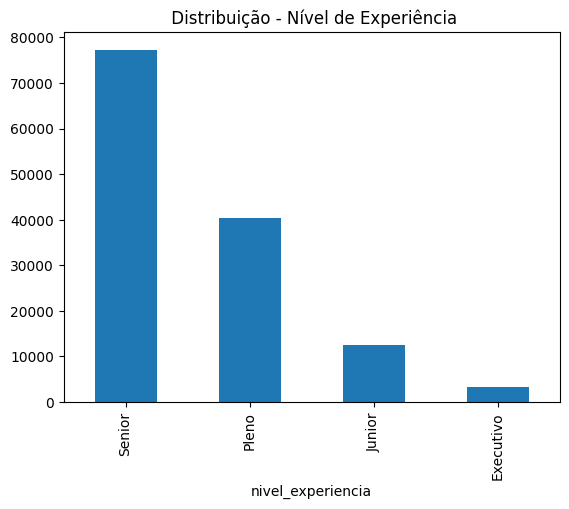

In [83]:
df_limpo['nivel_experiencia'].value_counts().plot(kind='bar', title=' Distribui√ß√£o - N√≠vel de Experi√™ncia')

# criando uma visualiza√ß√£o gr√°fica com a frequencia dos dados
# df_limpo['nivel_experiencia'].value_counts() -> conta valores da coluna
# plot(kind='bar', title=' Distribui√ß√£o - N√≠vel de Experi√™ncia') -> cria vizualiza√ß√£o desses valores em gr√°fico de barras


In [84]:
'''
Bibliotecas para elaborar um gr√°fico, "plotar": Matplotlib e Seaborn
'''

'\nBibliotecas para elaborar um gr√°fico, "plotar": Matplotlib e Seaborn\n'

In [85]:
# importando biblioteca
import seaborn as sns

<Axes: xlabel='nivel_experiencia', ylabel='salario_em_usd'>

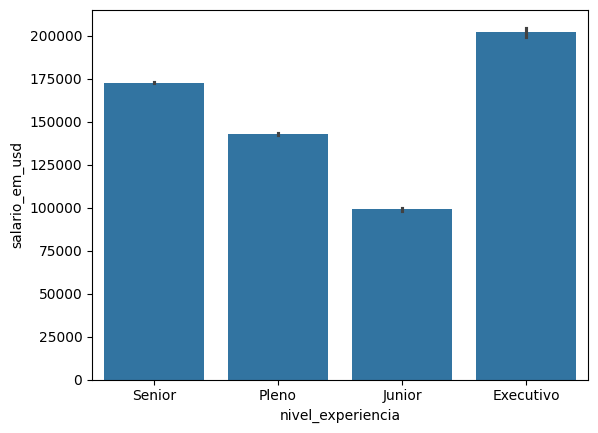

In [86]:
sns.barplot(data=df_limpo, x='nivel_experiencia', y='salario_em_usd')

# criando uma visualiza√ß√£o gr√°fica com a frequencia dos dados
# comparando s√°larios em dolar com n√≠vel de experiencia
# -> cria vizualiza√ß√£o desses valores em gr√°fico de barras

In [87]:
# Importando modulo da lib matplot
import matplotlib.pyplot as plt

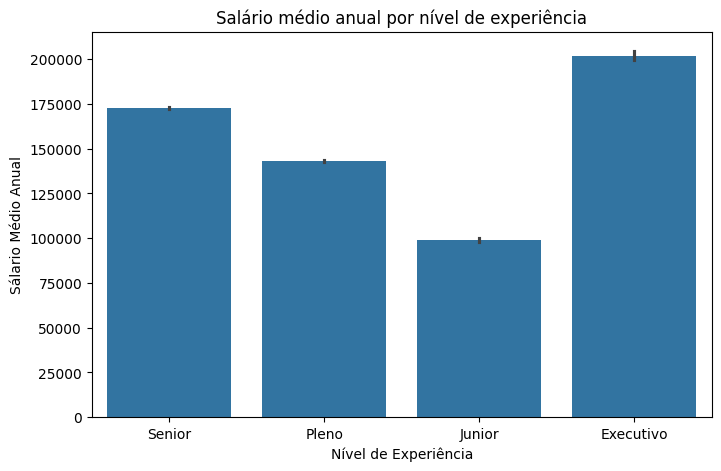

In [88]:
# Personalizando Gr√°fico com matplot

plt.figure(figsize=(8,5)) # definindo tamanho da figura
sns.barplot(data=df_limpo, x='nivel_experiencia', y='salario_em_usd') # criando gr√°fico
plt.title('Sal√°rio m√©dio anual por n√≠vel de experi√™ncia') # Inserindo t√≠tulo
plt.xlabel('N√≠vel de Experi√™ncia') # label do eixo X
plt.ylabel('S√°lario M√©dio Anual') # label do eixo Y

plt.show()

In [89]:
# agrupando e ordenando valores
df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=True)

nivel_experiencia
Junior        99034.963267
Pleno        143044.845979
Senior       172850.838301
Executivo    202027.667813
Name: salario_em_usd, dtype: float64

In [90]:
ordem = df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=True).index

print(ordem)

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='nivel_experiencia')


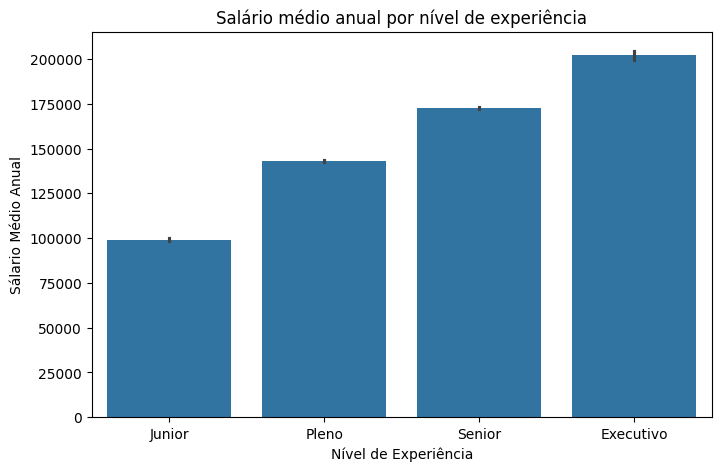

In [91]:
#Gr√°fico ordenado

plt.figure(figsize=(8,5)) # definindo tamanho da figura
sns.barplot(data=df_limpo, x='nivel_experiencia', y='salario_em_usd', order=ordem) # criando gr√°fico
plt.title('Sal√°rio m√©dio anual por n√≠vel de experi√™ncia') # Inserindo t√≠tulo
plt.xlabel('N√≠vel de Experi√™ncia') # label do eixo X
plt.ylabel('S√°lario M√©dio Anual') # label do eixo Y

plt.show()

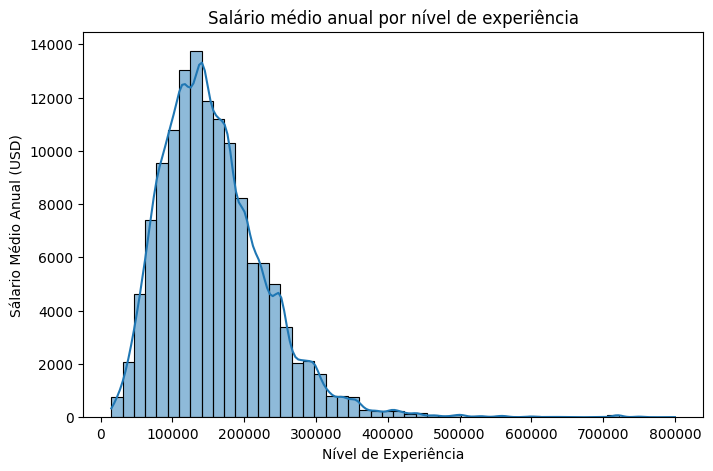

In [92]:
 #Criando um histograma

plt.figure(figsize=(8,5)) # definindo tamanho da figura
sns.histplot(df_limpo['salario_em_usd'], bins=50, kde=True) # criando Histograma
plt.title('Sal√°rio m√©dio anual por n√≠vel de experi√™ncia') # Inserindo t√≠tulo
plt.xlabel('N√≠vel de Experi√™ncia') # label do eixo X
plt.ylabel('S√°lario M√©dio Anual (USD)') # label do eixo Y

plt.show()

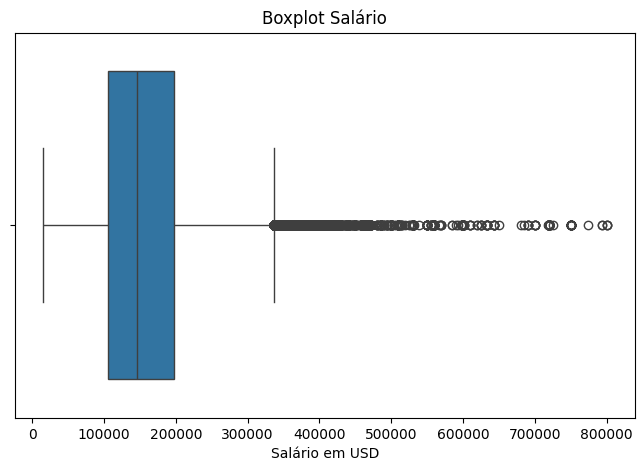

In [93]:
 plt.figure(figsize=(8,5))
 sns.boxplot(x=df_limpo['salario_em_usd'])
 plt.title('Boxplot Sal√°rio')
 plt.xlabel('Sal√°rio em USD')

 plt.show()

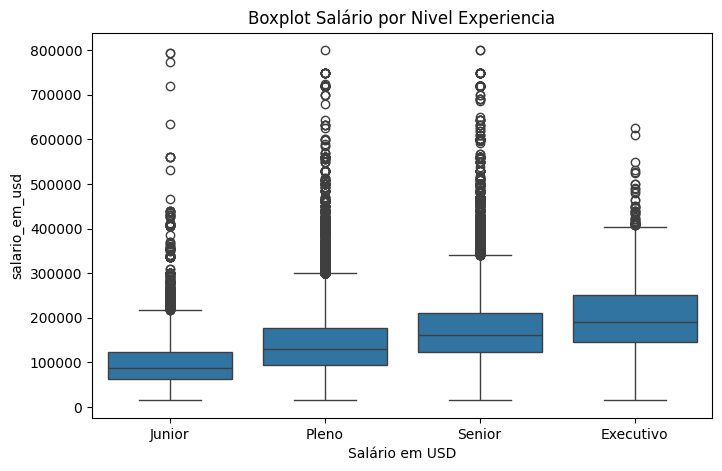

In [94]:
 ordem_nivel_experiencia = ['Junior', 'Pleno', 'Senior', 'Executivo' ]

 plt.figure(figsize=(8,5))
 sns.boxplot(x='nivel_experiencia', y='salario_em_usd', data=df_limpo, order=ordem_nivel_experiencia)
 plt.title('Boxplot Sal√°rio por Nivel Experiencia')
 plt.xlabel('Sal√°rio em USD')

 plt.show()

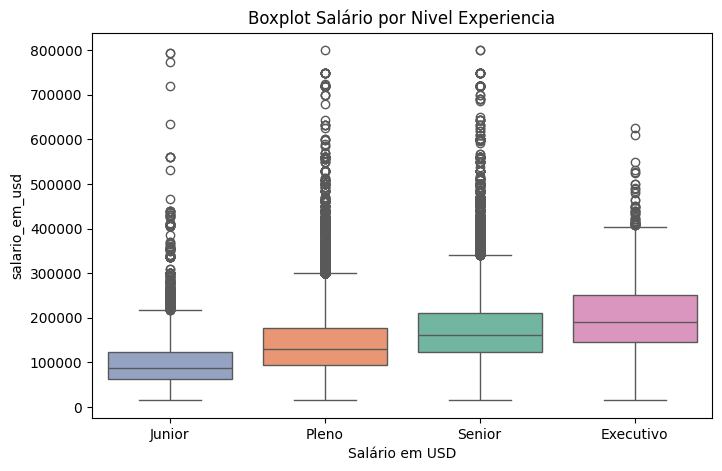

In [95]:
 ordem_nivel_experiencia = ['Junior', 'Pleno', 'Senior', 'Executivo' ]

 plt.figure(figsize=(8,5))
 sns.boxplot(x='nivel_experiencia', y='salario_em_usd', data=df_limpo, order=ordem_nivel_experiencia, palette='Set2', hue='nivel_experiencia')
 plt.title('Boxplot Sal√°rio por Nivel Experiencia')
 plt.xlabel('Sal√°rio em USD')

 plt.show()

In [96]:
# Biblioteca para gr√°ficos interativos
import plotly.express as px

In [97]:
nivel_experiencia_media_salario = df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=False).reset_index( )

fig = px.bar(nivel_experiencia_media_salario,
             x='nivel_experiencia',
             y='salario_em_usd',
             title='M√©dia Salarial por Senioridade',
             labels={'nivel_experiencia': 'N√≠vel de Experiencia',
                     'salario_em_usd':  'Sal√°rio em dolar anual'
                    })
fig.show()

In [98]:
remoto_contagem = df_limpo['taxa_remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Propor√ß√£o modelo de trabalho'
            )
fig.show()

In [99]:
remoto_contagem = df_limpo['taxa_remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Propor√ß√£o modelo de trabalho',
             hole=0.5 #buraco do gr√°fico

            )
fig.update_traces(textinfo='percent+label') # exibir porcentagem
fig.show()

In [100]:
df_limpo.head()

ano_trabalho nivel_experiencia    tipo_emprego               cargo  \
0          2025            Senior  Tempo Integral  Solutions Engineer   
1          2025            Senior  Tempo Integral  Solutions Engineer   
2          2025             Pleno  Tempo Integral       Data Engineer   
3          2025             Pleno  Tempo Integral       Data Engineer   
4          2025            Junior  Tempo Integral       Data Engineer   

   salario moeda_salario  salario_em_usd residencia taxa_remoto  \
0   214000           USD          214000         US      Remoto   
1   136000           USD          136000         US      Remoto   
2   158800           USD          158800         AU  Presencial   
3   139200           USD          139200         AU  Presencial   
4    90000           USD           90000         US  Presencial   

  localizacao_empresa porte_empresa  
0                  US         M√©dia  
1                  US         M√©dia  
2                  AU         M√©dia  
3                  AU         M√©dia  
4                  US         M√©dia

# Desafio da aula 3
Crie um gr√°fico interativo com os sal√°rios de cientistas de dados por senioridade.

In [1]:
# Ordem personalizada
ordem_nivel_experiencia = ['Junior', 'Pleno', 'Senior', 'Executivo']

# Filtrar apenas Data Scientist
df_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']

# Calcular a m√©dia salarial por n√≠vel de experi√™ncia
nivel_experiencia_media_salario = (
    df_data_scientist
    .groupby('nivel_experiencia')['salario_em_usd']
    .mean()
    .reindex(ordem_nivel_experiencia)  # garante a ordem mesmo se faltar categorias
    .dropna()  # remove n√≠veis que n√£o existam no filtro
    .reset_index()
)

# Criar o gr√°fico
fig = px.bar(
    nivel_experiencia_media_salario,
    x='nivel_experiencia',
    y='salario_em_usd',
    title='M√©dia Salarial por N√≠vel de Experi√™ncia (Data Scientist)',
    labels={
        'nivel_experiencia': 'N√≠vel de Experi√™ncia',
        'salario_em_usd': 'Sal√°rio em d√≥lar anual'
    }
)

fig.show()


NameError: name 'df_limpo' is not defined

dddddd

In [ ]:
ndncn,mzxmzxnc

# Aula 4 - Construindo um Dashboard com Streamlit

> Aprender a usar a biblioteca Streamlit para a cria√ß√£o de um dashboard interativo simples, que permite visualizar dados filtrados e gerar gr√°ficos de forma pr√°tica.

https://dashboard-salarios-dados.streamlit.app/

1. Criar o ambiente virtual:

```bash
python3 -m venv .venv
```

2. Ativar o ambiente virtual em Windows:

```bash
.venv\Scripts\Activate
```

3. Ativar o ambiente virtual em MAC/LINUX:
```bash
source .venv/bin/activate
```

4. Criar um arquivo chamado requirements.txt e adicionar os pacotes necess√°rios

```bash
pandas==2.2.3
streamlit==1.44.1
plotly==5.24.1
```

5. Instalar as bibliotecas necess√°rias

```bash
pip install -r requirements.txt
```

6. Criar a Interface do Dashboard com Streamlit

Para rodar localmente no Streamlit:

```bash
streamlit run nome_do_app.py
```

7. Realizar o deploy do Dashboard no Streamlit Cloud: https://streamlit.io/cloud.


```python
import streamlit as st
import pandas as pd
import plotly.express as px

# --- Configura√ß√£o da P√°gina ---
# Define o t√≠tulo da p√°gina, o √≠cone e o layout para ocupar a largura inteira.
st.set_page_config(
    page_title="Dashboard de Sal√°rios na √Årea de Dados",
    page_icon="üìä",
    layout="wide",
)

# --- Carregamento dos dados ---
df = pd.read_csv("https://raw.githubusercontent.com/vqrca/dashboard_salarios_dados/refs/heads/main/dados-imersao-final.csv")

# --- Barra Lateral (Filtros) ---
st.sidebar.header("üîç Filtros")

# Filtro de Ano
anos_disponiveis = sorted(df['ano'].unique())
anos_selecionados = st.sidebar.multiselect("Ano", anos_disponiveis, default=anos_disponiveis)

# Filtro de Senioridade
senioridades_disponiveis = sorted(df['senioridade'].unique())
senioridades_selecionadas = st.sidebar.multiselect("Senioridade", senioridades_disponiveis, default=senioridades_disponiveis)

# Filtro por Tipo de Contrato
contratos_disponiveis = sorted(df['contrato'].unique())
contratos_selecionados = st.sidebar.multiselect("Tipo de Contrato", contratos_disponiveis, default=contratos_disponiveis)

# Filtro por Tamanho da Empresa
tamanhos_disponiveis = sorted(df['tamanho_empresa'].unique())
tamanhos_selecionados = st.sidebar.multiselect("Tamanho da Empresa", tamanhos_disponiveis, default=tamanhos_disponiveis)

# --- Filtragem do DataFrame ---
# O dataframe principal √© filtrado com base nas sele√ß√µes feitas na barra lateral.
df_filtrado = df[
    (df['ano'].isin(anos_selecionados)) &
    (df['senioridade'].isin(senioridades_selecionadas)) &
    (df['contrato'].isin(contratos_selecionados)) &
    (df['tamanho_empresa'].isin(tamanhos_selecionados))
]

# --- Conte√∫do Principal ---
st.title("üé≤ Dashboard de An√°lise de Sal√°rios na √Årea de Dados")
st.markdown("Explore os dados salariais na √°rea de dados nos √∫ltimos anos. Utilize os filtros √† esquerda para refinar sua an√°lise.")

# --- M√©tricas Principais (KPIs) ---
st.subheader("M√©tricas gerais (Sal√°rio anual em USD)")

if not df_filtrado.empty:
    salario_medio = df_filtrado['usd'].mean()
    salario_maximo = df_filtrado['usd'].max()
    total_registros = df_filtrado.shape[0]
    cargo_mais_frequente = df_filtrado["cargo"].mode()[0]
else:
    salario_medio, salario_mediano, salario_maximo, total_registros, cargo_mais_comum = 0, 0, 0, ""

col1, col2, col3, col4 = st.columns(4)
col1.metric("Sal√°rio m√©dio", f"${salario_medio:,.0f}")
col2.metric("Sal√°rio m√°ximo", f"${salario_maximo:,.0f}")
col3.metric("Total de registros", f"{total_registros:,}")
col4.metric("Cargo mais frequente", cargo_mais_frequente)

st.markdown("---")

# --- An√°lises Visuais com Plotly ---
st.subheader("Gr√°ficos")

col_graf1, col_graf2 = st.columns(2)

with col_graf1:
    if not df_filtrado.empty:
        top_cargos = df_filtrado.groupby('cargo')['usd'].mean().nlargest(10).sort_values(ascending=True).reset_index()
        grafico_cargos = px.bar(
            top_cargos,
            x='usd',
            y='cargo',
            orientation='h',
            title="Top 10 cargos por sal√°rio m√©dio",
            labels={'usd': 'M√©dia salarial anual (USD)', 'cargo': ''}
        )
        grafico_cargos.update_layout(title_x=0.1, yaxis={'categoryorder':'total ascending'})
        st.plotly_chart(grafico_cargos, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gr√°fico de cargos.")

with col_graf2:
    if not df_filtrado.empty:
        grafico_hist = px.histogram(
            df_filtrado,
            x='usd',
            nbins=30,
            title="Distribui√ß√£o de sal√°rios anuais",
            labels={'usd': 'Faixa salarial (USD)', 'count': ''}
        )
        grafico_hist.update_layout(title_x=0.1)
        st.plotly_chart(grafico_hist, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gr√°fico de distribui√ß√£o.")

col_graf3, col_graf4 = st.columns(2)

with col_graf3:
    if not df_filtrado.empty:
        remoto_contagem = df_filtrado['remoto'].value_counts().reset_index()
        remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
        grafico_remoto = px.pie(
            remoto_contagem,
            names='tipo_trabalho',
            values='quantidade',
            title='Propor√ß√£o dos tipos de trabalho',
            hole=0.5
        )
        grafico_remoto.update_traces(textinfo='percent+label')
        grafico_remoto.update_layout(title_x=0.1)
        st.plotly_chart(grafico_remoto, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gr√°fico dos tipos de trabalho.")

with col_graf4:
    if not df_filtrado.empty:
        df_ds = df_filtrado[df_filtrado['cargo'] == 'Data Scientist']
        media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()
        grafico_paises = px.choropleth(media_ds_pais,
            locations='residencia_iso3',
            color='usd',
            color_continuous_scale='rdylgn',
            title='Sal√°rio m√©dio de Cientista de Dados por pa√≠s',
            labels={'usd': 'Sal√°rio m√©dio (USD)', 'residencia_iso3': 'Pa√≠s'})
        grafico_paises.update_layout(title_x=0.1)
        st.plotly_chart(grafico_paises, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gr√°fico de pa√≠ses.")

# --- Tabela de Dados Detalhados ---
st.subheader("Dados Detalhados")
st.dataframe(df_filtrado)
```


# Aula 4 Extra - Explicando Desafio da Aula 3 (Gr√°fico 4 do projeto)

> Diferen√ßa de m√©dia salarial entre Cientistas de Dados (Data Scientist) por pa√≠s

In [101]:
# instalando biblioteca para converter siglas ISO 2 para ISO 3
pip install pycountry

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.3/6.3 MB 37.2 MB/s eta 0:00:00


In [102]:
df_limpo.head()

ano_trabalho nivel_experiencia    tipo_emprego               cargo  \
0          2025            Senior  Tempo Integral  Solutions Engineer   
1          2025            Senior  Tempo Integral  Solutions Engineer   
2          2025             Pleno  Tempo Integral       Data Engineer   
3          2025             Pleno  Tempo Integral       Data Engineer   
4          2025            Junior  Tempo Integral       Data Engineer   

   salario moeda_salario  salario_em_usd residencia taxa_remoto  \
0   214000           USD          214000         US      Remoto   
1   136000           USD          136000         US      Remoto   
2   158800           USD          158800         AU  Presencial   
3   139200           USD          139200         AU  Presencial   
4    90000           USD           90000         US  Presencial   

  localizacao_empresa porte_empresa  
0                  US         M√©dia  
1                  US         M√©dia  
2                  AU         M√©dia  
3                  AU         M√©dia  
4                  US         M√©dia

In [104]:
# Importando biblioteca para cria√ß√£o de mapas
import pycountry

# Fun√ß√£o para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except AttributeError:
        return None

# Criar nova coluna com c√≥digo ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular m√©dia salarial por pa√≠s (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['salario_em_usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='salario_em_usd',
                    color_continuous_scale='rdylgn', # paleta de cores
                    title='Sal√°rio m√©dio de Cientista de Dados por pa√≠s',
                    labels={'salario_em_usd': 'Sal√°rio m√©dio (USD)', 'residencia_iso3': 'Pa√≠s' }
                    )
fig.show()

In [105]:
df_limpo.head()

ano_trabalho nivel_experiencia    tipo_emprego               cargo  \
0          2025            Senior  Tempo Integral  Solutions Engineer   
1          2025            Senior  Tempo Integral  Solutions Engineer   
2          2025             Pleno  Tempo Integral       Data Engineer   
3          2025             Pleno  Tempo Integral       Data Engineer   
4          2025            Junior  Tempo Integral       Data Engineer   

   salario moeda_salario  salario_em_usd residencia taxa_remoto  \
0   214000           USD          214000         US      Remoto   
1   136000           USD          136000         US      Remoto   
2   158800           USD          158800         AU  Presencial   
3   139200           USD          139200         AU  Presencial   
4    90000           USD           90000         US  Presencial   

  localizacao_empresa porte_empresa residencia_iso3  
0                  US         M√©dia             USA  
1                  US         M√©dia             USA  
2                  AU         M√©dia             AUS  
3                  AU         M√©dia             AUS  
4                  US         M√©dia             USA

In [106]:
# Salvar base de dados em CSV
df_limpo.to_csv('dados-imersao-python-final.csv')